In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.get_option("display.max_columns")
pd.set_option('display.max_columns', 500)
import csv
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./data/county_level_manually_created.csv')

In [3]:
display(df.columns)
display(df.head())
display(df.shape)
display(df.isna().sum())
df2 = df.drop(['Average Grade Performance','Cohort Size','% Adults with Diabetes'],axis=1)
display(df2.isna().sum())
df3 = df2[df2['Life Expectancy'].notna()].copy()
avg_hs_grad = np.mean(df3['High School Graduation Rate'])
df3['High School Graduation Rate'] = df3['High School Graduation Rate'].fillna(avg_hs_grad)
display(df3.isna().sum())
X = df3.drop(['FIPS', 'State', 'County', 'Life Expectancy',],axis=1)
y = df3['Life Expectancy']
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.isna().sum()
# df_scaled = scaler.fit_transform(df.iloc[:,3:])
# df_scaled_df = pd.DataFrame(data=df_scaled, columns=df.columns[3:])
# # print(df_scaled_df)

Index(['FIPS', 'State', 'County', 'Life Expectancy',
       '% Frequent Physical Distress', '% Frequent Mental Distress',
       '% Adults with Diabetes', '% Food Insecure', '% Insufficient Sleep',
       'Median Household Income', '% Homeowners',
       '% Severe Housing Cost Burden', 'Cohort Size',
       'High School Graduation Rate', 'Average Grade Performance'],
      dtype='object')

,FIPS,State,County,Life Expectancy,% Frequent Physical Distress,% Frequent Mental Distress,% Adults with Diabetes,% Food Insecure,% Insufficient Sleep,Median Household Income,% Homeowners,% Severe Housing Cost Burden,Cohort Size,High School Graduation Rate,Average Grade Performance
0,1000,Alabama,NaN,75.5,14,16,15,17,40,51771.0,69,12.0,55151.0,90.0,2.9
1,1001,Alabama,Autauga,77.2,13,16,13,16,38,58233.0,73,13.0,652.0,89.0,3.1
2,1003,Alabama,Baldwin,78.2,12,15,10,13,36,59871.0,75,11.0,2305.0,88.0,3.2
3,1005,Alabama,Barbour,74.1,18,19,18,22,41,35972.0,61,14.0,261.0,82.0,2.4
4,1007,Alabama,Bibb,73.4,15,17,14,15,40,47918.0,74,9.0,225.0,88.0,2.7


(3193, 15)

FIPS                               0
State                              0
County                            51
Life Expectancy                   69
% Frequent Physical Distress       0
% Frequent Mental Distress         0
% Adults with Diabetes             0
% Food Insecure                    0
% Insufficient Sleep               0
Median Household Income            1
% Homeowners                       0
% Severe Housing Cost Burden       3
Cohort Size                      556
High School Graduation Rate      556
Average Grade Performance       3125
dtype: int64

FIPS                              0
State                             0
County                           51
Life Expectancy                  69
% Frequent Physical Distress      0
% Frequent Mental Distress        0
% Food Insecure                   0
% Insufficient Sleep              0
Median Household Income           1
% Homeowners                      0
% Severe Housing Cost Burden      3
High School Graduation Rate     556
dtype: int64

FIPS                             0
State                            0
County                          51
Life Expectancy                  0
% Frequent Physical Distress     0
% Frequent Mental Distress       0
% Food Insecure                  0
% Insufficient Sleep             0
Median Household Income          0
% Homeowners                     0
% Severe Housing Cost Burden     0
High School Graduation Rate      0
dtype: int64

% Frequent Physical Distress    0
% Frequent Mental Distress      0
% Food Insecure                 0
% Insufficient Sleep            0
Median Household Income         0
% Homeowners                    0
% Severe Housing Cost Burden    0
High School Graduation Rate     0
dtype: int64

In [4]:
# scaler = MinMaxScaler()
# # scaler = StandardScaler()
# # transform data
# df_scaled = scaler.fit_transform(df.iloc[:,3:])
# df_scaled_df = pd.DataFrame(data=df_scaled, columns=df.columns[3:])
# # print(df_scaled_df)
# df2 = pd.concat([df.iloc[:,:3],df_scaled_df], axis=1)

(3124, 8)

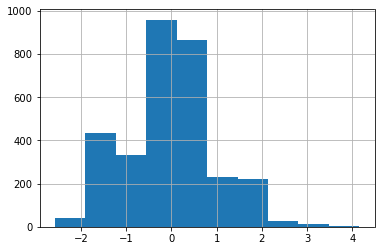

In [5]:
# df2['Life Expectancy'].hist(bins=80)
X_scaled['% Frequent Mental Distress'].hist()
X_scaled.shape

In [6]:
# df_states = df2[df2['County'].isnull()].copy()
# df_states.shape
# df_no_null = df.dropna().copy()
# df_no_null.shape

In [7]:
# X = df_no_null.drop(['FIPS', 'State', 'County', 'Life Expectancy', 'Average Grade Performance', 'Cohort Size'], axis=1)
# y = df_no_null['Life Expectancy']
# X.isna().sum()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# forest = RandomForestRegressor()
# forest.fit(X,y)
forest = RandomForestRegressor()
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
r2_score(y_test, y_pred)

0.5444426535670652

In [10]:
# forest = RandomForestRegressor()
# forest.fit(X,y)
forest = RandomForestRegressor(n_estimators=500, )
forest.fit(X_train,y_train)
y_pred_train = forest.predict(X_train)
display(r2_score(y_train, y_pred_train))
y_pred = forest.predict(X_test)
display(r2_score(y_test, y_pred))

0.9414394517239655

0.5435528275095027

In [28]:
# forest = RandomForestRegressor()
# forest.fit(X,y)
forest = RandomForestRegressor(min_samples_split=8,max_depth=10, n_estimators=500, random_state=42)
forest.fit(X_train,y_train)
y_pred_train = forest.predict(X_train)
display(r2_score(y_train, y_pred_train))
y_pred = forest.predict(X_test)
display(r2_score(y_test, y_pred))
display(X_train.shape)


0.8087522327650135

0.5504793626858367

(2499, 8)

In [29]:
X_train

,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Insufficient Sleep,Median Household Income,% Homeowners,% Severe Housing Cost Burden,High School Graduation Rate
1746,1.279234,0.790055,1.000794,0.792076,-0.834608,-0.062161,0.287556,0.000000
1967,0.139597,0.369374,-0.063993,-0.219037,-0.244087,0.794918,-0.000831,-0.795083
2757,-1.000040,-0.892666,-0.330190,-0.977371,0.500444,-1.041679,0.287556,0.000000
3120,-1.759798,-2.154706,-0.862583,-2.494040,2.953118,-1.408998,-0.000831,-0.004797
2488,2.038992,2.472775,1.266991,1.550410,-0.891837,1.284677,-0.577605,0.785489
...,...,...,...,...,...,...,...,...
3092,-0.620161,-0.892666,-1.394977,-0.977371,0.603759,-0.307040,0.864330,0.943547
1095,1.659113,1.631415,1.000794,1.550410,-1.039657,0.550038,0.287556,1.101604
1130,0.899355,1.210735,1.266991,0.539298,-0.588632,-0.062161,-0.289218,0.785489
1294,-0.240282,-0.051306,-0.596387,0.539298,0.580304,1.039797,-0.289218,-0.162854


In [49]:
gbm = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=42, min_samples_split=2
                                , min_samples_leaf=2)
gbm.fit(X_train, y_train)
y_pred_train = gbm.predict(X_train)
display(r2_score(y_train, y_pred_train))
y_pred = gbm.predict(X_test)
display(r2_score(y_test, y_pred))

0.6749622761388898

0.545348516631994

In [53]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
display(r2_score(y_train, y_pred_train))
y_pred = reg.predict(X_test)
display(r2_score(y_test, y_pred))

0.5718816571218711

0.550969092975025

In [58]:
print(reg.coef_)

[ 0.09991863 -1.06313697 -0.63519366 -0.48119549  0.55553312  0.3024067
  0.4934197   0.05912479]


In [12]:
display(np.std(y))
display(np.mean(y))
display(y.shape)
est_pop_US = 3.3e6
print(est_pop_US)
sample_scaler = y.shape[0] / est_pop_US
print(sample_scaler)
print(np.std(y) / sample_scaler)

3.1168008333801223

77.5328745198464

(3124,)

3300000.0
0.0009466666666666666
3292.3952465282982


In [13]:
X_scaled.describe()

,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Insufficient Sleep,Median Household Income,% Homeowners,% Severe Housing Cost Burden,High School Graduation Rate
count,3.124000e+03,3.124000e+03,3.124000e+03,3.124000e+03,3.124000e+03,3.124000e+03,3.124000e+03,3.124000e+03
mean,-4.554615e-16,-3.611956e-16,1.992875e-15,-5.410738e-16,2.631005e-16,5.733783e-16,3.533949e-16,-6.373121e-16
std,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00,1.000160e+00
min,-2.519556e+00,-2.575386e+00,-2.459764e+00,-2.746818e+00,-2.144210e+00,-6.306588e+00,-2.596313e+00,-9.330174e+00
25%,-6.201609e-01,-8.926660e-01,-5.963866e-01,-7.245930e-01,-6.601001e-01,-5.519196e-01,-5.776046e-01,-3.209114e-01
50%,-2.402820e-01,-5.130574e-02,-6.399290e-02,3.374152e-02,-1.627831e-01,1.827190e-01,-8.308201e-04,0.000000e+00
75%,5.194760e-01,7.900545e-01,7.345976e-01,7.920760e-01,4.515376e-01,6.724781e-01,5.759430e-01,6.274321e-01
max,5.837782e+00,4.155495e+00,4.461353e+00,3.067079e+00,6.596602e+00,2.264195e+00,5.766907e+00,1.891890e+00


In [14]:
# y_pred = forest.predict(X_test)
# r2_score(y_test, y_pred)
[ 0.09991863 -1.06313697 -0.63519366 -0.48119549  0.55553312  0.3024067
  0.4934197   0.05912479]

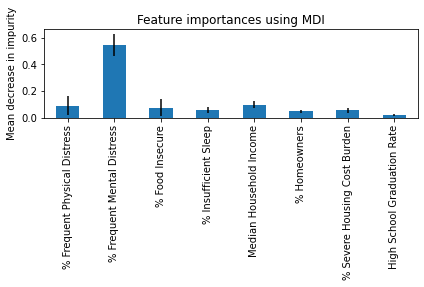

In [15]:
feature_names = X.columns
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [16]:

print(5*5*3*3*2*2*3)
X.columns

2700


Index(['% Frequent Physical Distress', '% Frequent Mental Distress',
       '% Food Insecure', '% Insufficient Sleep', 'Median Household Income',
       '% Homeowners', '% Severe Housing Cost Burden',
       'High School Graduation Rate'],
      dtype='object')

5400
(5400, 8)


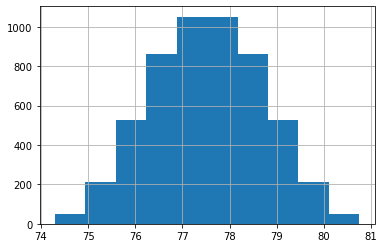

In [54]:
W = ['A','B','C','D','E']
five_value = [0.2,0.35,0,0.65,0.8]
three_value = [0.2,0,0.8]
two_value = [0.35,0.65]

five_value = [-0.842,-0.385,0,0.385,0.842]
five_value = [-1.28,-0.52,0,0.52,1.28]
three_value = [-0.842,0,0.842]
three_value = [-0.842,0,0.842]
two_value = [-0.385,0.385]

code = []
Q1 = []
Q2 = []
Q3 = []
Q4 = []
Q5 = []
Q6 = []
Q7 = []
Q8 = []
i =0
for q1_i in range(5):
    for q2_i in range(5):
        for q3_i in range(3):
            for q4_i in range(3):
                for q5_i in range(3):
                    for q6_i in range(2):
                        for q7_i in range(2):
                            for q8_i in range(2):
                                i += 1
                                Q1.append(five_value[q1_i])
                                Q2.append(five_value[q2_i])
                                Q3.append(three_value[q3_i])
                                Q4.append(three_value[q4_i])
                                Q5.append(three_value[q5_i])
                                Q6.append(two_value[q6_i])
                                Q7.append(two_value[q7_i])
                                Q8.append(two_value[q8_i])
                                temp = W[q1_i] + W[q2_i] + W[q3_i] + W[q4_i] + W[q5_i] + W[q6_i] + W[q7_i] + W[q8_i]
                                code.append(temp)
print(i)

df_to_test = pd.DataFrame(
    {'% Frequent Physical Distress': Q1,
     '% Frequent Mental Distress': Q2,
     '% Food Insecure': Q3,
     '% Insufficient Sleep': Q4,
     'Median Household Income': Q5,
     '% Homeowners': Q6,
     '% Severe Housing Cost Burden': Q7,
     'High School Graduation Rate': Q8,
     'code':code
    })

df_to_test.head(10)
X_staged = df_to_test.iloc[:,:8]
X_staged.head()
print(X_staged.shape)
# y_staged = forest.predict(X_staged)
# y_staged = gbm.predict(X_staged)
y_staged = reg.predict(X_staged)

df_staged = X_staged.copy()
df_staged['pred'] = y_staged
df_staged.head()
df_staged.pred.hist()
df_staged['code'] = code
df_staged.head()      
df_staged.to_csv('df_staged.csv')
    

In [18]:
X.columns

Index(['% Frequent Physical Distress', '% Frequent Mental Distress',
       '% Food Insecure', '% Insufficient Sleep', 'Median Household Income',
       '% Homeowners', '% Severe Housing Cost Burden',
       'High School Graduation Rate'],
      dtype='object')

In [55]:
def one_line_of_dict(code, pred):
    temp = '"{}":"{}",'.format(str(code), str(pred)[:5])
    return temp
df_staged.head()
df_staged['dictionary'] = df_staged.apply(lambda x: one_line_of_dict(x['code'], x['pred']),axis=1)
df_staged
df_staged.to_csv('df_staged.csv')


## Plan 20211120
- Find standard deviation of each metric. See if that would give a reasonable prediction/ metrics.
- Tune the model to be more predictive. See if it will fly or not.
- Build to post and pre processing necessary to take inputs and turn them into outputs.

In [ ]:
display(df.columns)
display(df.head())
display(df.shape)
display(df.isna().sum())
df2 = df.drop(['Average Grade Performance','Cohort Size'],axis=1)
display(df2.isna().sum())
df3 = df2[df2['Life Expectancy'].notna()].copy()
avg_hs_grad = np.mean(df3['High School Graduation Rate'])
df3['High School Graduation Rate'] = df3['High School Graduation Rate'].fillna(avg_hs_grad)
display(df3.isna().sum())
X = df3.drop(['FIPS', 'State', 'County', 'Life Expectancy',],axis=1)
y = df3['Life Expectancy']
# scaler = MinMaxScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.isna().sum()
# df_scaled = scaler.fit_transform(df.iloc[:,3:])
# df_scaled_df = pd.DataFrame(data=df_scaled, columns=df.columns[3:])
# # print(df_scaled_df)

In [149]:
import scipy.stats as stats

In [151]:
x = 0.6
cdf = stats.binom.cdf
cdf(x, 0, 1)

1.0

In [152]:
x-0.6
invnorm.cdf(x,1,loc=0,scale=1)

NameError: name 'invnorm' is not defined

In [153]:
x = 0.6
stats.norm.ppf(x)

0.2533471031357997

In [155]:
reg = LogisticRegression(random_state=42)
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
display(r2_score(y_train, y_pred_train))
y_pred = reg.predict(X_test)
display(r2_score(y_test, y_pred))

ValueError: Unknown label type: 'continuous'